In [10]:
import fitz  # PyMuPDF
import os

# Carpeta donde están los PDFs
carpeta_pdf = r"C:\Users\Esteban Valle\montepiedad\Caso 4"
carpeta_salida = r"C:\Users\Esteban Valle\montepiedad\Caso 4\Caso 4 img"
os.makedirs(carpeta_salida, exist_ok=True)

# Recorremos todos los archivos PDF
for archivo in os.listdir(carpeta_pdf):
    if archivo.lower().endswith(".pdf"):
        ruta_pdf = os.path.join(carpeta_pdf, archivo)
        nombre_base = os.path.splitext(archivo)[0]
        carpeta_individual = os.path.join(carpeta_salida, nombre_base)
        os.makedirs(carpeta_individual, exist_ok=True)

        print(f"Convirtiendo: {archivo}")
        doc = fitz.open(ruta_pdf)

        for i, pagina in enumerate(doc):
            pix = pagina.get_pixmap(dpi=200)
            ruta_imagen = os.path.join(carpeta_individual, f"pagina_{i+1}.jpg")
            pix.save(ruta_imagen)
            print(f"Guardada: {ruta_imagen}")


Convirtiendo: TK 63274-2.pdf
Guardada: C:\Users\Esteban Valle\montepiedad\Caso 4\Caso 4 img\TK 63274-2\pagina_1.jpg
Convirtiendo: TK 63274-3.pdf
Guardada: C:\Users\Esteban Valle\montepiedad\Caso 4\Caso 4 img\TK 63274-3\pagina_1.jpg
Convirtiendo: TK 63274-4.pdf
Guardada: C:\Users\Esteban Valle\montepiedad\Caso 4\Caso 4 img\TK 63274-4\pagina_1.jpg


In [1]:
from ultralytics import YOLO

yolo_firma_model = YOLO(r"C:\Users\Esteban Valle\montepiedad\yolo_firmas\result2\best.pt")


0: 480x640 1 signature, 66.5ms
Speed: 1.8ms preprocess, 66.5ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 C:\Users\Esteban Valle\montepiedad\Caso 7\Caso 7 img\TK 64056-2\pagina_1.jpg: 640x512 1 signature, 71.6ms
Speed: 2.5ms preprocess, 71.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 512)


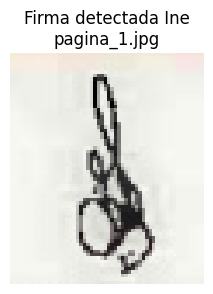

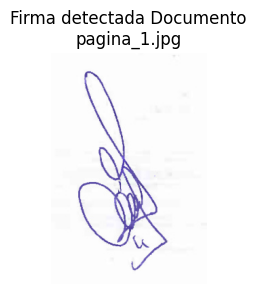

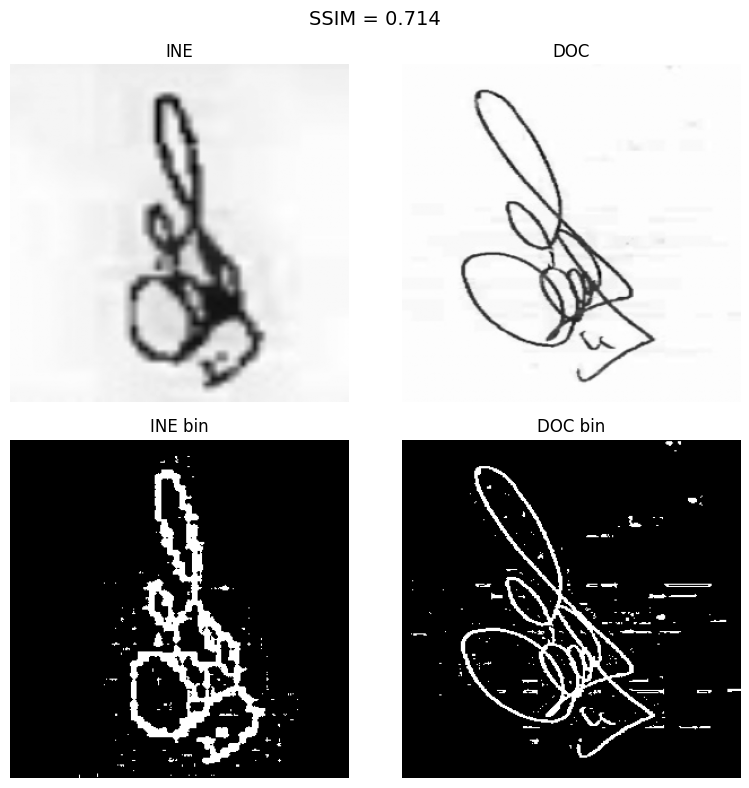

{'score': np.float64(0.7144858165570868), 'match': np.True_}


In [28]:
from signaturepipeline import SignaturePipeline

pipe = SignaturePipeline(
    firma_detector_model = yolo_firma_model,
    conf_ine  = 0.5,                  # score mínimo del detector
    conf_doc = 0.5,                  # score mínimo del detector
    visualize = True,                 # mostrar firmas comparadaas
    visualize_ine = True,             # mostrar pasos intermedios
    visualize_doc = True,             # mostrar pasos intermedios
    compare_threshold = 0.7             # score mínimo del comparación    
)

result = pipe.compare(
    ine_img_1_path = r"C:\Users\Esteban Valle\montepiedad\Caso 7\Caso 7 img\TK 64056-3\pagina_1.jpg",
    ine_img_2_path = r"C:\Users\Esteban Valle\montepiedad\Caso 7\Caso 7 img\TK 64056-4\pagina_1.jpg",
    doc_img_path   = r"C:\Users\Esteban Valle\montepiedad\Caso 7\Caso 7 img\TK 64056-2\pagina_1.jpg"
)

print(result)  
